In [7]:
import numpy as np

def func(x):
    return -x * (x-10)
def between(x, i0, i1):
    indxs = np.where(np.logical_and(x>=i0, x<= i1))[0]
    return indxs

In [8]:
# Calibration
def calibrate(cals, cal_t, x, t):
    polyvals = np.zeros_like(x)
    x0s = np.zeros_like(x)
    x1s = np.zeros_like(x)
    a = np.searchsorted(t, cal_t)
    j = 0
    section_a = 0
    for i, x_i in enumerate(x):
        if (j+1) >= len(a):
            polyvals[i] = x_i
            section_a += 1
            continue
        elif i > a[j+1]:
            j = min(j + 1, len(a)-1)
            if (j+1 < len(a)) and (a[j] <= i and i <= a[j+1]): 
                x0 = np.polyval(cals[j], x_i)
                x0s[i] = x0
                x1 = np.polyval(cals[j+1], x_i)
                x1s[i] = x1
                w = (t[i] - t[a[j]] * 1.0) / ( t[a[j+1]] - t[a[j]] * 1.0)

                polyvals[i] = x0 * (1 - w) + x1 * w
            else:
                polyvals[i] = x_i
        elif a[j] <= i and i <= a[j+1]: 
            x0 = np.polyval(cals[j], x_i)
            x0s[i] = x0
            x1 = np.polyval(cals[j+1], x_i)
            x1s[i] = x1
            w = (t[i] - t[a[j]] * 1.0) / ( t[a[j+1]] - t[a[j]] * 1.0)
            polyvals[i] = x0 * (1 - w) + x1 * w
        else:
            polyvals[i] = x_i
    
    return polyvals


In [9]:
x = np.linspace(0,10,1000)

In [10]:
y = func(x)

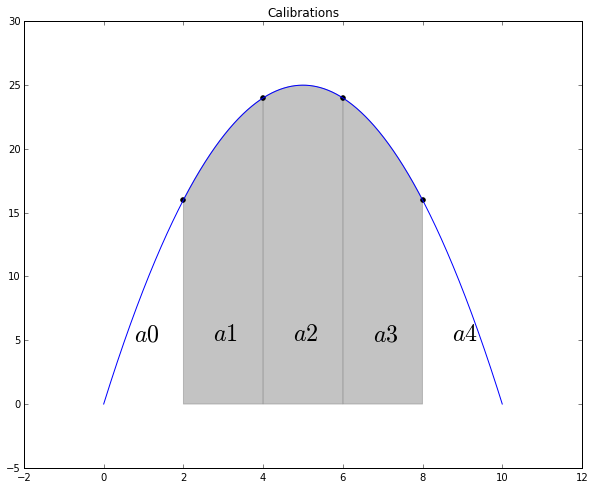

In [13]:
pylab.rcParams['figure.figsize'] = (10., 8.)
fig = plt.subplot(111)
fig.set_title("Calibrations")
fig.plot(x,y)

# Label for a0
fig.text(0.75, 5, '$a0$', fontsize=24)

# Section a1 [2,4]
a1 = x[between(x, 2, 4)]
fig.fill_between(a1, func(a1), color='#888888', alpha='0.5')
fig.text(2.75, 5, '$a1$', fontsize=24)
fig.scatter(2, func(2),color='k', alpha=1.0)

# Section a2 [4,6]
a2 = x[between(x, 4, 6)]
fig.fill_between(a2, func(a2), color='#888888', alpha='0.5')
fig.text(4.75, 5, '$a2$', fontsize=24)
fig.scatter(4, func(4), color='k', alpha=1.0)

# Section a3 [6,8]
a3 = x[between(x, 6, 8)]
fig.fill_between(a3, func(a3), color='#888888', alpha='0.5')
fig.text(6.75, 5, '$a3$', fontsize=24)
fig.scatter(6, func(6), color='k', alpha=1.0)

# Label for a4
fig.scatter(8, func(8), color='k', alpha=1.0)
fig.text(8.75, 5, '$a4$', fontsize=24)


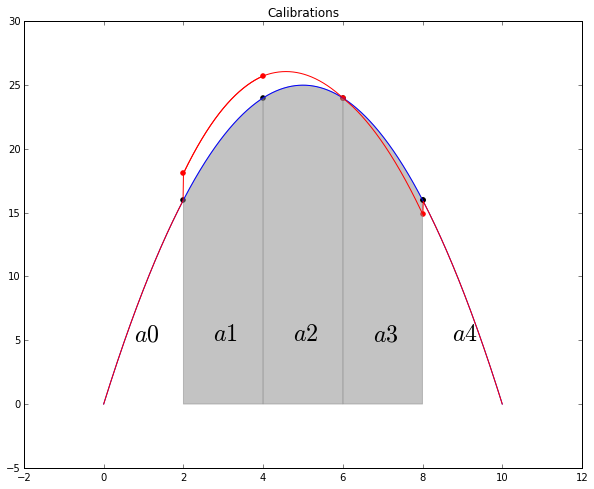

In [15]:
pylab.rcParams['figure.figsize'] = (10., 8.)
fig = plt.subplot(111)
fig.set_title("Calibrations")
fig.plot(x,y)


cc_a0 = [1.13, 0.]
cc_a1 = [1.03, 1.]
cc_a2 = [1.0, 0.]
cc_a3 = [1.01, -1.25]


cals = np.array([cc_a0, cc_a1, cc_a2, cc_a3])
cal_t = np.array([2, 4, 6, 8])
poly_pts = np.empty(shape=(4,), dtype=np.float)
for i in xrange(4):
    poly_pts[i] = np.polyval(cals[i], func(cal_t[i]))

polycals = calibrate(cals, cal_t, y, x)
fig.plot(x, polycals, color='r')

fig.scatter(cal_t, func(cal_t), color='k')
fig.scatter(cal_t, poly_pts, color='r')

# Label for a0
fig.text(0.75, 5, '$a0$', fontsize=24)

# Section a1 [2,4]
a1 = x[between(x, 2, 4)]
fig.fill_between(a1, func(a1), color='#888888', alpha='0.5')
fig.plot(a1, polycals[between(x, 2, 4)], color='r')
fig.text(2.75, 5, '$a1$', fontsize=24)

# Section a2 [4,6]
a2 = x[between(x, 4, 6)]
fig.fill_between(a2, func(a2), color='#888888', alpha='0.5')
fig.text(4.75, 5, '$a2$', fontsize=24)

# Section a3 [6,8]
a3 = x[between(x, 6, 8)]
fig.fill_between(a3, func(a3), color='#888888', alpha='0.5')
fig.text(6.75, 5, '$a3$', fontsize=24)

# Label for a4
fig.scatter(8, func(8), color='k', alpha=1.0)
fig.text(8.75, 5, '$a4$', fontsize=24)
